Leonardo Coronado Arvayo

# Descenso de gradiente

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Crear datos

In [272]:
data = pd.read_csv("/home/noxd/Doc/Machine Learning/datos/fish_market/Fish.csv", header=0)

In [273]:
data["one"] = 1
data_B = data.loc[data['Species'] == "Perch"]
data_B.shape

(56, 8)

In [274]:
x = data_B[[ "one","Length1", "Length2", "Length3", "Height", "Width"]].to_numpy()
y = data_B["Weight"].to_numpy()
y= np.reshape(y, (56, 1))
x.shape, y.shape

((56, 6), (56, 1))

In [275]:
def x_ext(x, order):
    """El primer elemento es el 1 extra."""
    
    x_ex = [1]
    for c in x[1:]:
        for i in range(1, order + 1):
            x_ex.append(c**i)
    return np.array(x_ex)


def X_ext(X, order):
    X_ex = np.zeros((len(X), 1 + (len(X[0]) - 1) * order))
    for i, x in enumerate(X):
        X_ex[i] = x_ext(x, order)
    return X_ex


def x_ext2(x, order):
    X = []
    for i in range(order + 1):
        X.append(x**i)
    return np.array(X)

# Orden 2

In [276]:
X = X_ext(x, 2)
orden=2
X.shape

(56, 11)

### Descenso de gradiente (sin rescalar)

In [277]:
epochs = 8000
lr = .0000001
W = np.zeros((X.shape[1], 1))
m=X.shape[0]

In [278]:
for i in range(epochs):
    prev = W
    Y = np.matmul(X, W)
    D_j = (sum((Y - y) * X).reshape(X.shape[1], 1) / m)
    W = prev - (lr * D_j)
    
    diff = np.linalg.norm(prev - W)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .00001):
        print("Convergió.", i)
        break

### Decenso de gradiente rescalada (0-1)

In [279]:
scaler = MinMaxScaler()
X_s = scaler.fit_transform(x)
y_s = scaler.fit_transform(y)
S = X_ext(X_s, orden)
S.shape

(56, 11)

In [280]:
epochs = 5000
lr = 0.01
W_s = np.zeros((X.shape[1] , 1))

for i in range(epochs):
    prev = W_s
    Y = np.matmul(S, W_s)
    D_j = sum((Y - y_s) * S).reshape(X.shape[1], 1) / m
    W_s = prev - (lr * D_j)
    
    diff = np.linalg.norm(prev - W_s)
    if (diff > 100):
        print("Muy grande", i)
        break
    if (diff < .00001):
        print("Convergió.", i)
        break

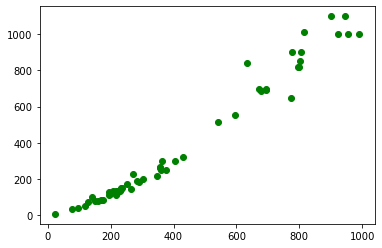

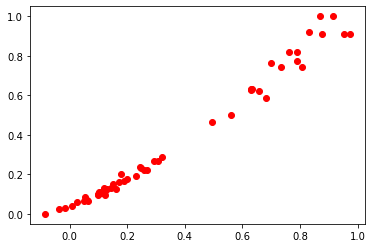

In [281]:
#no las pude gráficar juntas por los diferentes tamaños en el axis x
plt.scatter(np.matmul(X, W), y, c="g")
plt.show()
plt.scatter(np.matmul(S, W_s), y_s, c="r")
plt.show()

### Métrica de error

In [282]:
error=mean_squared_error(y, np.matmul(X, W))
error_s=mean_squared_error(y_s, np.matmul(S, W_s))
print(error, error_s)

8751.820875294594 0.0017079350048282795
